In [5]:
#Importing libraries

import pandas as pd
import json
import os

In [32]:
# Loading the json data 
root_data_dir='/Users/HVMS/Desktop/GitHub/CineAI/data'

In [33]:
for sub_dir in sorted(os.listdir(root_data_dir)):
    print(sub_dir)  # Print each subdirectory in order

.DS_Store
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [34]:
for sub_dir in sorted(os.listdir(root_data_dir+ '/2000/')):
    print(sub_dir)

batch_001.json
batch_002.json
batch_003.json
batch_004.json
batch_005.json
batch_006.json
batch_007.json
batch_008.json


In [15]:
test_batch_1_2000 = data_batch_dir+ '/2000/batch_001.json'
with open(test_batch_1_2000, 'r') as file_1:
    data_1 = json.load(file_1)

In [16]:
len(data_1)

1000

In [17]:
#To get movie ID
for movie_id in data_1:
    for keys,values in movie_id.items():
        print(keys)

98
8871
7443
9532
77
8358
22705
10867
4247
11688
10567
2123
2024
1359
1443
4234
3134
8843
5833
10501
1443
8358
10637
1900
10577
1636
9741
16366
107
2085
5994
5833
9600
2069
9679
11978
843
3536
20677
9383
9679
11978
9383
8584
1907
146
10559
10393
12107
3176
2085
1636
1493
10647
2655
59709
11518
10035
15999
19576
20677
10577
3536
16234
243
10481
10876
19457
71
10991
2155
9600
10783
36968
5551
2440
15653
49948
8452
641
2069
2067
5491
16
11075
9456
1597
134
889
4244
10571
55892
20770
8859
10461
12609
2332
10687
11973
21614
10571
5551
889
479
7290
20455
18079
8653
18041
14626
8452
49948
19419
1588
10641
105904
10471
24102
10873
193457
1588
30628
4958
101514
2787
31347
41245
447399
62182
392
10569
11366
12211
9871
105904
711
327
18011
10473
10862
8653
193457
16340
16187
117087
10385
8870
12480
10560
10597
18041
10429
11983
14805
10472
48246
13785
37588
60670
55888
10873
24102
1163
14181
919
10642
44321
44853
28031
11599
10562
21355
24100
41275
12650
24664
24476
10180
10480
30970
18079
19348


In [24]:
# To get movie individual keys columns such as(endpoints) - expecting 15 endpoints

first_movie = data_1[0]
movie_id = list(first_movie.keys())[0]
endpoints = first_movie[movie_id].keys()

print(f"Endpoints for movie ID {movie_id}:")
for endpoint in endpoints:
    print(f"- {endpoint}")

Endpoints for movie ID 98:
- details
- credits
- recommendations
- watch_providers


In [25]:
# Getting keys from 'details' endpoint for first movie
first_movie = data_1[0]  # Get first movie
movie_id = list(first_movie.keys())[0]  # Get movie ID
details_keys = first_movie[movie_id]['details'].keys()  # Get details keys

print(f"\nKeys in 'details' for movie {movie_id}:")
for key in sorted(details_keys):
    print(f"- {key}")


Keys in 'details' for movie 98:
- genres
- id
- original_language
- overview
- popularity
- release_date
- runtime
- title


In [26]:
# Getting the first movie and its ID
movie = data_1[0]
movie_id = list(movie.keys())[0]
movie_data = movie[movie_id]

# Print all endpoint keys
print(f"\nAll endpoint keys for movie ID {movie_id}:")
for endpoint in sorted(movie_data.keys()):
    print(f"\n{endpoint.upper()} keys:")
    try:
        keys = movie_data[endpoint].keys()
        for key in sorted(keys):
            print(f"- {key}")
    except AttributeError:
        print("(No nested keys)")


All endpoint keys for movie ID 98:

CREDITS keys:
- cast
- crew

DETAILS keys:
- genres
- id
- original_language
- overview
- popularity
- release_date
- runtime
- title

RECOMMENDATIONS keys:
- results

WATCH_PROVIDERS keys:
- results


In [27]:
movie = data_1[0]
movie_id = list(movie.keys())[0]
movie_data = movie[movie_id]

# Initializing counter
total_keys = 0

# To Count and print keys for each endpoint
print(f"\nKey counts for movie ID {movie_id}:")
for endpoint in sorted(movie_data.keys()):
    try:
        keys = movie_data[endpoint].keys()
        num_keys = len(keys)
        total_keys += num_keys
        print(f"{endpoint}: {num_keys} keys")
    except AttributeError:
        print(f"{endpoint}: No nested keys")

print(f"\nTotal number of keys across all endpoints: {total_keys}")


Key counts for movie ID 98:
credits: 2 keys
details: 8 keys
recommendations: 1 keys
watch_providers: 1 keys

Total number of keys across all endpoints: 12


In [29]:
movie = data_1[0]
movie_id = list(movie.keys())[0]
movie_data = movie[movie_id]

# Assuming the details are nested within another dictionary, for example under 'details'
details = movie_data.get('details', {})

# Extracting the required details from the nested dictionary
title = details.get('title', 'N/A')
runtime = details.get('runtime', 'N/A')
release_date = details.get('release_date', 'N/A')
genres = details.get('genres', 'N/A')
overview = details.get('overview', 'N/A')

# Printing the extracted details
print(f"Title: {title}")
print(f"Runtime: {runtime} minutes")
print(f"Release Date: {release_date}")
print(f"Genres: {genres}")
print(f"Overview: {overview}")

Title: Gladiator
Runtime: 155 minutes
Release Date: 2000-05-04
Genres: [{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 12, 'name': 'Adventure'}]
Overview: In the year 180, the death of Emperor Marcus Aurelius throws the Roman Empire into chaos. Maximus is one of the Roman army's most capable and trusted generals, as well as a key advisor to the emperor. As Marcus' devious son Commodus ascends to the throne, Maximus is sentenced to execution. He escapes but is captured by slave traders. Renamed "Spaniard" and forced to become a gladiator, Maximus must battle to the death against other men for the amusement of paying audiences.


In [31]:
# # Extracting movie details
# movie_id = list(data_1[0].keys())[0]
# movie_data = data_1[0][movie_id]

# details = movie_data.get('details', {})
# movie_dict = {
#     'Title': details.get('title', 'N/A'),
#     'Runtime': details.get('runtime', 'N/A'),
#     'Release Date': details.get('release_date', 'N/A'),
#     'Genres': ', '.join([genre['name'] for genre in details.get('genres', [])]),
#     'Overview': details.get('overview', 'N/A')
# }

# # # Creating DataFrame
# # df = pd.DataFrame([movie_dict])  # Convert dictionary to DataFrame
# # print(df)

In [39]:
# Remove .DS_Store file if it exists
ds_store_path = os.path.join(root_data_dir, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)
    print('.DS_Store file removed')
else:
    print('.DS_Store file not found')

.DS_Store file removed


In [47]:
def data_pipeline(root_dir):
    all_movie_details = []
    for year_dir in os.listdir(root_dir):
        year_path = os.path.join(root_dir, year_dir)
        if os.path.isdir(year_path):
            for json_file in sorted(os.listdir(year_path)):
                file_path = os.path.join(year_path, json_file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)

                    for movie in data:
                        movie_id = list(movie.keys())[0]
                        movie_data = movie[movie_id]
                        details = movie_data.get('details', {})

                        movie_details = {
                            'movie_id': movie_id,
                            'year': year_dir, # Add year
                            'Title': details.get('title', 'N/A'),
                            'Runtime': details.get('runtime', 'N/A'),
                            'Release Date': details.get('release_date', 'N/A'),
                            'Genres': ', '.join([genre['name'] for genre in details.get('genres', [])]),
                            'Overview': details.get('overview', 'N/A')
                        }
                        all_movie_details.append(movie_details)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON in {file_path}: {e}")
                except Exception as e: #catch all other exceptions
                  print(f"An unexpected error occurred: {e}")
    return pd.DataFrame(all_movie_details)

In [ ]:
# Example usage
movie_df = data_pipeline(root_data_dir)

  movie_id  year                   Title Runtime Release Date  \
0    68726  2013             Pacific Rim     131   2013-07-11   
1   464026  2013  Let's Go To Rose Motel      87   2013-08-14   
2   109418  2013             Grown Ups 2     101   2013-07-11   
3   231001  2013        All Hallows' Eve      82   2013-10-29   
4    62211  2013     Monsters University     104   2013-06-19   

                               Genres  \
0  Action, Science Fiction, Adventure   
1                      Drama, Romance   
2                              Comedy   
3                              Horror   
4                   Animation, Family   

                                            Overview  
0  Using massive piloted robots to combat the ali...  
1  Seong-soo hasn't had any physical contact with...  
2  Lenny has relocated his family back to the sma...  
3  While watching two children on Halloween night...  
4  A look at the relationship between Mike and Su...  


In [50]:
movie_df.tail(5)

,movie_id,year,Title,Runtime,Release Date,Genres,Overview
234847,533005,2004,Whispering Pines 3,8,2004-01-01,,"In her celebrated video art serial, Whispering..."
234848,531637,2004,Secrets of Pearl Harbor,44,2004-12-10,,Dennis Haysbert dives 160 feet beneath the wav...
234849,532486,2004,Los hijos del último jardín,0,2004-01-01,Thriller,
234850,530897,2004,Comme un poisson dans l'eau,18,2004-01-21,,"Daniel is in search of happiness, of human rel..."
234851,531628,2004,Quest for Columbus: In Search of the Santa Maria,44,2004-03-01,,Quest for Columbus: In Search of the Santa Mar...


In [52]:
movie_df.columns

Index(['movie_id', 'year', 'Title', 'Runtime', 'Release Date', 'Genres',
       'Overview'],
      dtype='object')

In [54]:
movie_df.shape

(234852, 7)

# EDA

In [55]:
# Check for missing values in each column
movie_df.isnull().sum()

movie_id        0
year            0
Title           0
Runtime         0
Release Date    0
Genres          0
Overview        0
dtype: int64

In [56]:
# Drop rows with missing values
movie_df = movie_df.dropna()

In [59]:
movie_df.columns

Index(['movie_id', 'year', 'Title', 'Runtime', 'Release Date', 'Genres',
       'Overview'],
      dtype='object')

In [60]:
# Basic statistics
print("Dataset Shape:", movie_df.shape)
print("\nBasic Statistics:")
print(movie_df.describe())


Dataset Shape: (234852, 7)

Basic Statistics:
       movie_id    year   Title  Runtime Release Date       Genres Overview
count    234852  234852  234852   234852       234852       234852   234852
unique   230587      24  207028      462         8768         7645   206276
top     1193094    2013    Home        0   2003-01-01  Documentary         
freq          3   10000      46    30538         2288        34654    23240


In [63]:
# Visualizing key distributions
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

<Figure size 1500x1000 with 0 Axes>

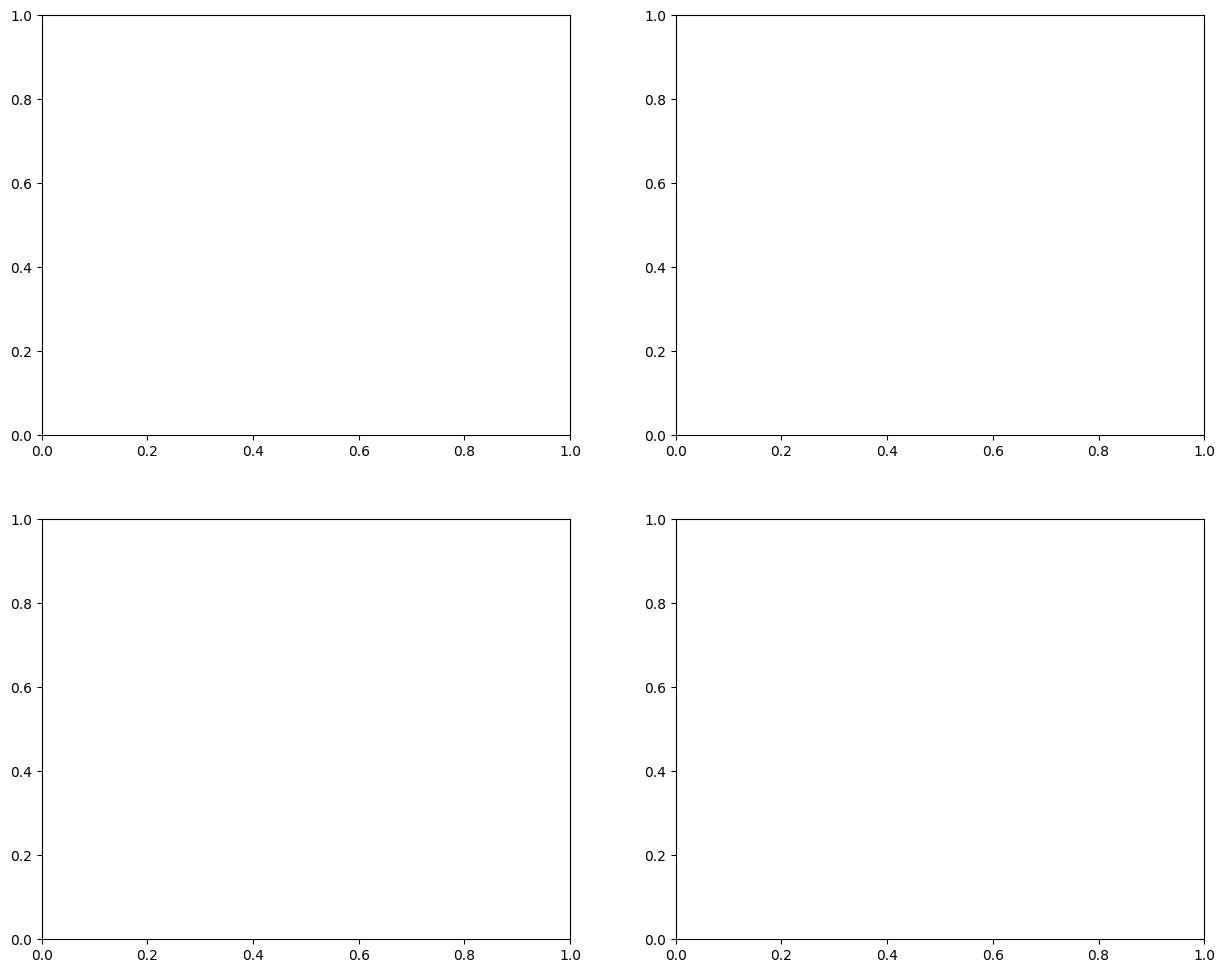

In [69]:
# Set default style without using style.use
plt.figure(figsize=(15, 10))

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))


In [71]:
# Step 1: Clean the Runtime column
movie_df['Runtime'] = pd.to_numeric(movie_df['Runtime'], errors='coerce')

In [72]:

# 1. Runtime Distribution
sns.histplot(data=movie_df, x='Runtime', bins=30, ax=ax1)
ax1.set_title('Distribution of Movie Runtimes')
ax1.set_xlabel('Runtime (minutes)')

Text(0.5, 508.44444444444457, 'Runtime (minutes)')

In [68]:
# 2. Movies by Year
sns.histplot(data=movie_df, x='year', bins=30, ax=ax2)
ax2.set_title('Movies by Release Year')

Text(0.5, 1.0, 'Movies by Release Year')

In [73]:
# 3. Top 10 Genres
genre_counts = movie_df['Genres'].value_counts().head(10)
genre_counts.plot(kind='bar', ax=ax3)
ax3.set_title('Top 10 Movie Genres')
ax3.tick_params(axis='x', rotation=45)

In [75]:
# 4. Movies by Month (handling N/A values)
# Convert Release Date to datetime, replacing invalid values with NaT
movie_df['Release Date'] = pd.to_datetime(movie_df['Release Date'], errors='coerce')
valid_dates = movie_df[movie_df['Release Date'].notna()]
sns.histplot(data=valid_dates, x=valid_dates['Release Date'].dt.month, bins=12, ax=ax4)
ax4.set_title('Movies by Release Month')
ax4.set_xlabel('Month')

Text(0.5, 4.444444444444452, 'Month')

In [76]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [77]:
# Print basic statistics
print("\nRelease Date Statistics:")
print(movie_df['Release Date'].describe())


Release Date Statistics:
count                           234845
mean     2012-03-20 01:04:01.267218688
min                2000-01-01 00:00:00
25%                2006-04-26 00:00:00
50%                2012-03-22 00:00:00
75%                2018-02-22 00:00:00
max                2023-12-31 00:00:00
Name: Release Date, dtype: object


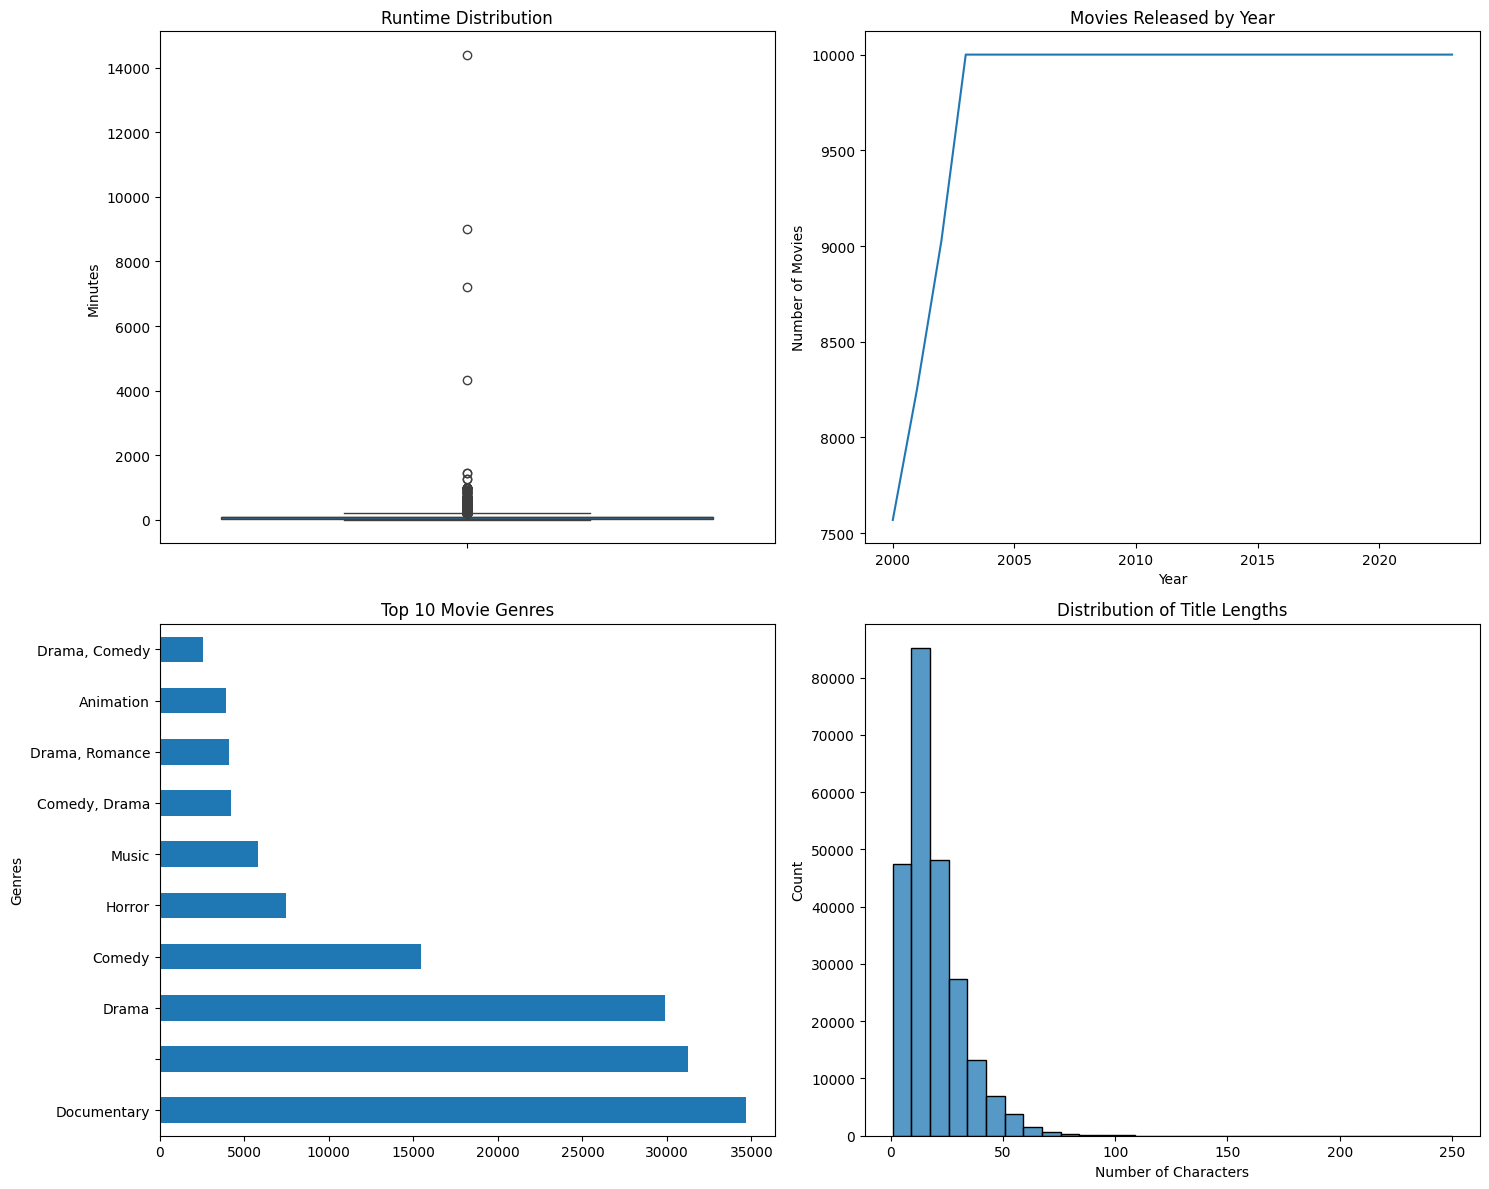


Summary Statistics:

Runtime Statistics:
count    234850.000000
mean         66.178254
std          62.243744
min           0.000000
25%          16.000000
50%          80.000000
75%          96.000000
max       14400.000000
Name: Runtime, dtype: float64

Most Common Genres:
Genres
Documentary    34654
               31251
Drama          29858
Comedy         15433
Horror          7475
Name: count, dtype: int64


In [78]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Runtime Analysis
movie_df['Runtime'] = pd.to_numeric(movie_df['Runtime'], errors='coerce')
sns.boxplot(y=movie_df['Runtime'].dropna(), ax=ax1)
ax1.set_title('Runtime Distribution')
ax1.set_ylabel('Minutes')

# 2. Year Distribution
year_counts = movie_df['year'].value_counts().sort_index()
year_counts.plot(kind='line', ax=ax2)
ax2.set_title('Movies Released by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Movies')

# 3. Genre Analysis
genre_counts = movie_df['Genres'].value_counts().head(10)
genre_counts.plot(kind='barh', ax=ax3)
ax3.set_title('Top 10 Movie Genres')

# 4. Title Length Analysis
movie_df['title_length'] = movie_df['Title'].str.len()
sns.histplot(data=movie_df, x='title_length', bins=30, ax=ax4)
ax4.set_title('Distribution of Title Lengths')
ax4.set_xlabel('Number of Characters')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nRuntime Statistics:")
print(movie_df['Runtime'].describe())
print("\nMost Common Genres:")
print(genre_counts.head())

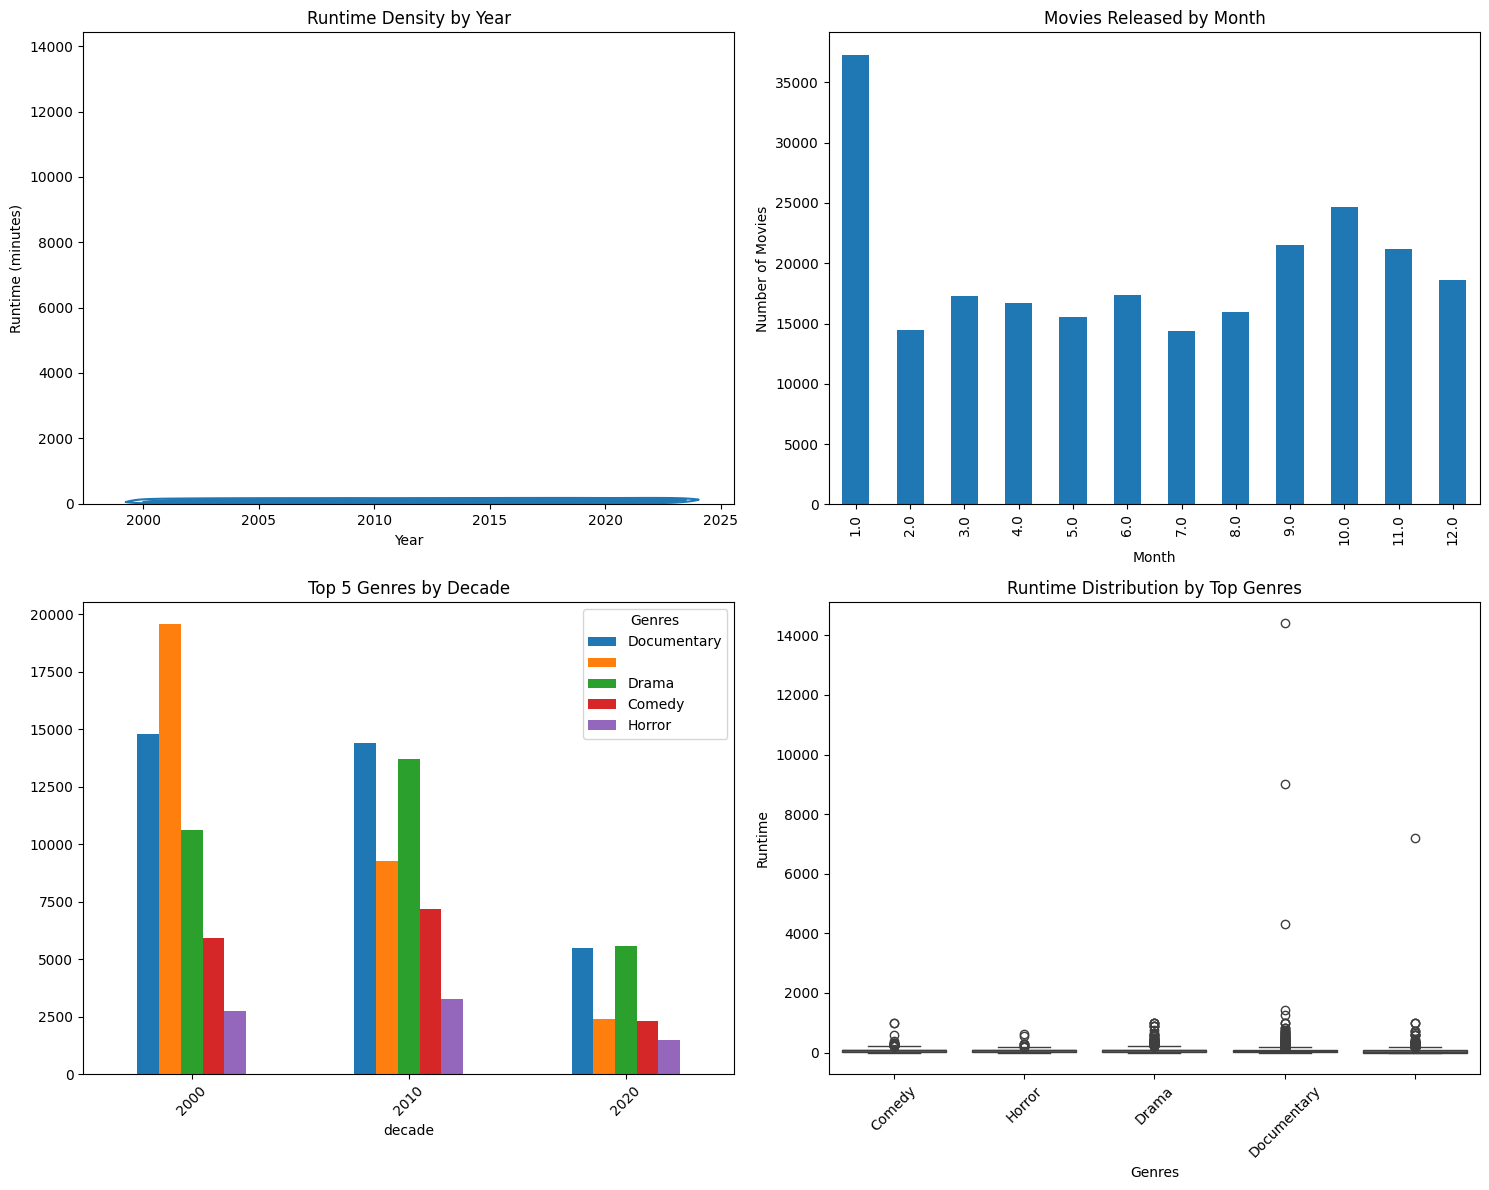


Top 5 Genres Statistics:

Documentary:
count    34654.000000
mean        60.818463
std        103.992747
min          0.000000
25%         28.000000
50%         60.000000
75%         87.000000
max      14400.000000
Name: Runtime, dtype: float64

:
count    31249.000000
mean        38.662197
std         62.336468
min          0.000000
25%          0.000000
50%         15.000000
75%         76.000000
max       7200.000000
Name: Runtime, dtype: float64

Drama:
count    29858.000000
mean        68.199176
std         49.164473
min          0.000000
25%         17.000000
50%         85.000000
75%        100.000000
max        990.000000
Name: Runtime, dtype: float64

Comedy:
count    15433.000000
mean        63.062593
std         46.192377
min          0.000000
25%         11.000000
50%         82.000000
75%         95.000000
max        990.000000
Name: Runtime, dtype: float64

Horror:
count    7475.000000
mean       64.603612
std        37.552622
min         0.000000
25%        27.000000
50

In [81]:
# Create subplots with adjusted figure size and fewer categories
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Runtime vs Year Trend (with density to handle overlapping points)
sns.kdeplot(data=movie_df, x='year', y='Runtime', ax=ax1)
ax1.set_title('Runtime Density by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Runtime (minutes)')

# 2. Monthly Release Pattern
monthly_releases = movie_df['month'].value_counts().sort_index()
monthly_releases.plot(kind='bar', ax=ax2)
ax2.set_title('Movies Released by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Movies')

# 3. Top 5 Genres Over Time
top_5_genres = movie_df['Genres'].value_counts().head().index
genre_decade = pd.crosstab(movie_df['decade'], 
                          movie_df['Genres'])[top_5_genres]
genre_decade.plot(kind='bar', ax=ax3)
ax3.set_title('Top 5 Genres by Decade')
ax3.tick_params(axis='x', rotation=45)

# 4. Runtime Box Plot for Top 5 Genres
sns.boxplot(data=genre_runtime, x='Genres', y='Runtime', ax=ax4)
ax4.set_title('Runtime Distribution by Top Genres')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics for top genres
print("\nTop 5 Genres Statistics:")
for genre in top_5_genres:
    print(f"\n{genre}:")
    print(movie_df[movie_df['Genres'] == genre]['Runtime'].describe())
